In [5]:
import math
import numpy as np
import pandas as pd
import h5py
import os
from matplotlib import pyplot as plt
import scipy.stats as st

In [2]:
normalize_df = np.array([[-813.318497,813.318497,1626.636994],
[-927.557905,927.557905,1855.115811],
[-616.430969,616.430969,1232.861938],
[-779.541208,779.541208,1559.082417],
[-598.479875,598.479875,1196.959749],
[-703.899302,703.899302,1407.798603],
[-1011.058909,1011.058909,2022.117818],
[-1519.952699,1519.952699,3039.905399],
[-1354.500198,1354.500198,2709.000397],
[-1705.832194,1705.832194,3411.664388],
[-1745.244320,1745.244320,3490.488641],
[-1486.945966,1486.945966,2973.891932]])
normalize_df

array([[ -813.318497,   813.318497,  1626.636994],
       [ -927.557905,   927.557905,  1855.115811],
       [ -616.430969,   616.430969,  1232.861938],
       [ -779.541208,   779.541208,  1559.082417],
       [ -598.479875,   598.479875,  1196.959749],
       [ -703.899302,   703.899302,  1407.798603],
       [-1011.058909,  1011.058909,  2022.117818],
       [-1519.952699,  1519.952699,  3039.905399],
       [-1354.500198,  1354.500198,  2709.000397],
       [-1705.832194,  1705.832194,  3411.664388],
       [-1745.24432 ,  1745.24432 ,  3490.488641],
       [-1486.945966,  1486.945966,  2973.891932]])

In [4]:
normalize_df = np.array(
[[-139.941898,139.941898,279.883795],
[-134.566014, 134.566014,269.132029],
[-78.064679 , 78.064679 ,156.129359],
[-129.421262,129.421262 ,258.842523],
[-92.999893 ,92.999893  ,185.999786],
[-88.909598 ,88.909598  ,177.819196],
[-163.487644,163.487644 ,326.975288],
[-202.913316,202.913316 ,405.826632],
[-194.017951,194.017951 ,388.035902],
[-222.348100,222.348100 ,444.696201],
[-249.415011,249.415011 ,498.830022],
[-216.065147,216.065147 ,432.130294]])

In [6]:
meta_data = pd.read_parquet('/mnt/data0-nfs/hthieu/anl/palisades/data/freeze/BROAD_ml4h_klarqvist___physionet__meta_data__graded_splits__72a414d507ba485db4bc5da0e97ecf2b.pq')
meta_data

,sample_id,n_leads,sampling_frequency,n_observations,datetime,time,mat,src,Age,Sex,...,17366009,251166008,164942001,multihot_all,multihot_graded_collapsed,have_graded_label,number_empty_leads,is_graded_train,is_graded_test,is_graded_validation
WFDB_CPSC2018_2/Q0374,Q0374,12,500,5000,15-May-2020,15:35:30,../../data/external/WFDB_CPSC2018_2/Q0374.mat,WFDB_CPSC2018_2,91,Male,...,0,0,0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,False,True,False
WFDB_CPSC2018_2/Q1946,Q1946,12,500,17000,15-May-2020,15:35:30,../../data/external/WFDB_CPSC2018_2/Q1946.mat,WFDB_CPSC2018_2,84,Female,...,0,0,0,"[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,False,True,False
WFDB_CPSC2018_2/Q2736,Q2736,12,500,7000,15-May-2020,15:35:30,../../data/external/WFDB_CPSC2018_2/Q2736.mat,WFDB_CPSC2018_2,74,Female,...,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,True,False,False
WFDB_CPSC2018_2/Q3517,Q3517,12,500,8000,15-May-2020,15:35:30,../../data/external/WFDB_CPSC2018_2/Q3517.mat,WFDB_CPSC2018_2,85,Male,...,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,False,False,True
WFDB_CPSC2018_2/Q2357,Q2357,12,500,23883,15-May-2020,15:35:30,../../data/external/WFDB_CPSC2018_2/Q2357.mat,WFDB_CPSC2018_2,65,Male,...,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WFDB_ChapmanShaoxing/JS00661,JS00661,12,500,5000,23-Mar-2021,20:59:37,../../data/external/WFDB_ChapmanShaoxing/JS006...,WFDB_ChapmanShaoxing,89,Male,...,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,True,False,False
WFDB_ChapmanShaoxing/JS09158,JS09158,12,500,5000,24-Mar-2021,06:21:18,../../data/external/WFDB_ChapmanShaoxing/JS091...,WFDB_ChapmanShaoxing,38,Male,...,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,True,False,False
WFDB_ChapmanShaoxing/JS01786,JS01786,12,500,5000,23-Mar-2021,22:05:43,../../data/external/WFDB_ChapmanShaoxing/JS017...,WFDB_ChapmanShaoxing,54,Male,...,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,True,False,False
WFDB_ChapmanShaoxing/JS08718,JS08718,12,500,5000,24-Mar-2021,05:53:05,../../data/external/WFDB_ChapmanShaoxing/JS087...,WFDB_ChapmanShaoxing,38,Male,...,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,True,False,False


In [7]:
meta_data = meta_data.loc[meta_data['Age'].dropna().index]
meta_data

,sample_id,n_leads,sampling_frequency,n_observations,datetime,time,mat,src,Age,Sex,...,17366009,251166008,164942001,multihot_all,multihot_graded_collapsed,have_graded_label,number_empty_leads,is_graded_train,is_graded_test,is_graded_validation
WFDB_CPSC2018_2/Q0374,Q0374,12,500,5000,15-May-2020,15:35:30,../../data/external/WFDB_CPSC2018_2/Q0374.mat,WFDB_CPSC2018_2,91,Male,...,0,0,0,"[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,False,True,False
WFDB_CPSC2018_2/Q1946,Q1946,12,500,17000,15-May-2020,15:35:30,../../data/external/WFDB_CPSC2018_2/Q1946.mat,WFDB_CPSC2018_2,84,Female,...,0,0,0,"[0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,False,True,False
WFDB_CPSC2018_2/Q2736,Q2736,12,500,7000,15-May-2020,15:35:30,../../data/external/WFDB_CPSC2018_2/Q2736.mat,WFDB_CPSC2018_2,74,Female,...,0,0,0,"[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,True,False,False
WFDB_CPSC2018_2/Q3517,Q3517,12,500,8000,15-May-2020,15:35:30,../../data/external/WFDB_CPSC2018_2/Q3517.mat,WFDB_CPSC2018_2,85,Male,...,0,0,0,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...","[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,False,False,True
WFDB_CPSC2018_2/Q2357,Q2357,12,500,23883,15-May-2020,15:35:30,../../data/external/WFDB_CPSC2018_2/Q2357.mat,WFDB_CPSC2018_2,65,Male,...,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WFDB_ChapmanShaoxing/JS00661,JS00661,12,500,5000,23-Mar-2021,20:59:37,../../data/external/WFDB_ChapmanShaoxing/JS006...,WFDB_ChapmanShaoxing,89,Male,...,0,0,0,"[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,True,False,False
WFDB_ChapmanShaoxing/JS09158,JS09158,12,500,5000,24-Mar-2021,06:21:18,../../data/external/WFDB_ChapmanShaoxing/JS091...,WFDB_ChapmanShaoxing,38,Male,...,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,True,False,False
WFDB_ChapmanShaoxing/JS01786,JS01786,12,500,5000,23-Mar-2021,22:05:43,../../data/external/WFDB_ChapmanShaoxing/JS017...,WFDB_ChapmanShaoxing,54,Male,...,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,True,False,False
WFDB_ChapmanShaoxing/JS08718,JS08718,12,500,5000,24-Mar-2021,05:53:05,../../data/external/WFDB_ChapmanShaoxing/JS087...,WFDB_ChapmanShaoxing,38,Male,...,0,0,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",True,0,True,False,False


In [8]:
meta_data['Age'] = meta_data.Age.astype(np.float32)

In [9]:
meta_data = meta_data[meta_data['Age'] > 0]

In [10]:
meta_data = meta_data[meta_data['n_observations'] >= 5000]

In [11]:
h5py_path = '/mnt/data0-nfs/hthieu/anl/palisades/data/freeze/BROAD_ml4h_klarqvist___physionet__waveforms__596f28a0e7254e3da30c369769f7312e__combined.h5'

In [12]:
f = h5py.File(h5py_path,'r')

In [13]:
import tqdm.notebook as tqdm

In [14]:
import blosc

def uncompress(key,hdf5,stored_dtype = np.int16):
    handle = hdf5[key]
    ecg = np.frombuffer(
        blosc.decompress(handle[()]), dtype=stored_dtype
    ).reshape(handle.attrs["shape"]).astype(np.float32)
    return ecg

In [15]:
min_max = {}

for path in meta_data.index.values:
    try:
        ecg = uncompress(path,f)
    except Exception as e:
        print(f"Failed {e}")
        continue
    
    min_max[path] = {}
    min_max[path]['min'] = ecg.min(axis=1)
    min_max[path]['max'] = ecg.max(axis=1)
    min_max[path]['shape'] = ecg.shape


In [16]:
# Example of bad ECG

In [17]:
temp = pd.DataFrame(np.array([b['min'] for a,b in min_max.items()]),index=[*min_max])
temp.apply(lambda x: np.argmin(x))

0     10501
1     10501
2     68081
3     10501
4     65295
5     10501
6     44533
7     10368
8     10368
9      1283
10    17249
11     9600
dtype: int64

In [18]:
# np.stack([ 2 * (e - normalize_table_balanced.iloc[i,0]) / (normalize_table_balanced.iloc[i,2]) - 1 for i,e in enumerate(ecg)])

In [16]:
temp2 = pd.DataFrame(np.array([b['min'] for a,b in min_max.items()]),index=[*min_max])
# temp2_valid = temp2[~(temp2 < -10e3).any(axis=1)]
# temp2_valid
temp2

,0,1,2,3,4,5,6,7,8,9,10,11
WFDB_CPSC2018_2/Q0374,-332.0,-759.0,-1073.0,-448.0,-345.0,-901.0,-1199.0,-1596.0,-2137.0,-2342.0,-1637.0,-1142.0
WFDB_CPSC2018_2/Q1946,-128.0,-318.0,-533.0,-467.0,-170.0,-387.0,-1366.0,-958.0,-1436.0,-1297.0,-675.0,-405.0
WFDB_CPSC2018_2/Q2736,-120.0,-224.0,-167.0,-688.0,-112.0,-177.0,-1708.0,-1897.0,-868.0,-637.0,-282.0,-175.0
WFDB_CPSC2018_2/Q3517,-69.0,-76.0,-831.0,-634.0,-73.0,-332.0,-876.0,-707.0,-580.0,-551.0,-292.0,-175.0
WFDB_CPSC2018_2/Q2357,-143.0,-352.0,-259.0,-695.0,-115.0,-305.0,-977.0,-1403.0,-1088.0,-998.0,-558.0,-261.0
...,...,...,...,...,...,...,...,...,...,...,...,...
WFDB_ChapmanShaoxing/JS00661,-142.0,-332.0,-459.0,-220.0,-151.0,-395.0,-337.0,-590.0,-991.0,-1069.0,-727.0,-337.0
WFDB_ChapmanShaoxing/JS09158,-268.0,-220.0,-112.0,-493.0,-200.0,-146.0,-1000.0,-1718.0,-1264.0,-869.0,-415.0,-151.0
WFDB_ChapmanShaoxing/JS01786,-429.0,-215.0,-293.0,-781.0,-420.0,-171.0,-1386.0,-2460.0,-1752.0,-1440.0,-669.0,-439.0
WFDB_ChapmanShaoxing/JS08718,-327.0,-264.0,-264.0,-669.0,-293.0,-234.0,-664.0,-1723.0,-1752.0,-1244.0,-815.0,-566.0


In [17]:
# lower bounds 99% confidence interval
min_99ci = temp2.apply(lambda a: st.t.interval(0.99, len(a)-1, loc=np.mean(a), scale=st.sem(a))).T.iloc[:,0]
min_99ci

0     -344.863144
1     -422.952784
2     -567.203505
3     -779.541208
4     -367.124479
5     -426.261911
6    -1011.059093
7    -1519.952577
8    -1354.500198
9    -1032.366142
10    -726.364629
11    -591.332016
Name: 0, dtype: float64

In [35]:
plot_df = pd.DataFrame(np.array([b['min'] for a,b in min_max.items()]),index=[*min_max])
plot_df = plot_df.loc[temp2_valid.index]
plot_df = plot_df.melt()
# plot_df = pd.DataFrame({'max': [b['max'] for a,b in min_max.items()] + [b['max'] for a,b in min_max_ukb.items()], 'class': list(np.repeat('physionet',len([*min_max]))) + list(np.repeat('ukb',len([*min_max_ukb]))) })
sns.displot(data=plot_df, x='value', hue='variable', kind='kde', fill=True, palette=sns.color_palette('bright')[:10] + sns.color_palette("Set2")[0:2], height=5, aspect=1.5)

NameError: name 'temp2_valid' is not defined

In [18]:
temp2 = pd.DataFrame(np.array([b['max'] for a,b in min_max.items()]),index=[*min_max])
# temp2_valid = temp2[~(temp2 > 10e3).any(axis=1)]
# temp2_valid
temp2

,0,1,2,3,4,5,6,7,8,9,10,11
WFDB_CPSC2018_2/Q0374,389.0,712.0,633.0,274.0,728.0,635.0,492.0,682.0,741.0,923.0,1583.0,1670.0
WFDB_CPSC2018_2/Q1946,503.0,470.0,349.0,167.0,468.0,356.0,229.0,406.0,623.0,774.0,1249.0,1197.0
WFDB_CPSC2018_2/Q2736,472.0,930.0,496.0,160.0,155.0,706.0,264.0,634.0,1027.0,2174.0,1867.0,1259.0
WFDB_CPSC2018_2/Q3517,1029.0,266.0,104.0,52.0,930.0,92.0,112.0,407.0,939.0,1777.0,2240.0,1811.0
WFDB_CPSC2018_2/Q2357,475.0,957.0,585.0,226.0,138.0,771.0,414.0,928.0,1860.0,2722.0,2564.0,1353.0
...,...,...,...,...,...,...,...,...,...,...,...,...
WFDB_ChapmanShaoxing/JS00661,234.0,249.0,156.0,117.0,293.0,156.0,122.0,366.0,722.0,1713.0,1996.0,1274.0
WFDB_ChapmanShaoxing/JS09158,434.0,673.0,464.0,244.0,234.0,527.0,1059.0,1205.0,1435.0,1791.0,1288.0,834.0
WFDB_ChapmanShaoxing/JS01786,732.0,849.0,429.0,298.0,366.0,508.0,1054.0,1332.0,1171.0,2347.0,1986.0,1557.0
WFDB_ChapmanShaoxing/JS08718,644.0,737.0,361.0,268.0,346.0,517.0,888.0,1405.0,1659.0,2128.0,2225.0,1562.0


In [19]:
# upperw bounds 99% confidence interval
max_99ci = temp2.apply(lambda a: st.t.interval(0.99, len(a)-1, loc=np.mean(a), scale=st.sem(a))).T.iloc[:,1]
max_99ci

0      813.318497
1      927.557906
2      616.430969
3      337.336156
4      598.479875
5      703.899362
6      509.987624
7      929.359106
8     1253.644508
9     1705.831949
10    1745.244320
11    1486.945967
Name: 1, dtype: float64

In [21]:
normalize_table = pd.DataFrame({'min': min_99ci, 'max': max_99ci, 'range': max_99ci - min_99ci})
normalize_table

,min,max,range
0,-344.863144,813.318497,1158.181641
1,-422.952784,927.557906,1350.510690
2,-567.203505,616.430969,1183.634475
3,-779.541208,337.336156,1116.877365
4,-367.124479,598.479875,965.604354
5,-426.261911,703.899362,1130.161273
6,-1011.059093,509.987624,1521.046717
7,-1519.952577,929.359106,2449.311683
8,-1354.500198,1253.644508,2608.144706
9,-1032.366142,1705.831949,2738.198091


In [22]:
normalize_table_balanced = pd.DataFrame({'min': -1*normalize_table[['min','max']].apply(lambda x: x[np.argmax(x.abs())],axis=1).abs(), 'max': normalize_table[['min','max']].apply(lambda x: x[np.argmax(x.abs())],axis=1).abs()})
normalize_table_balanced['range'] = normalize_table_balanced['max'] - normalize_table_balanced['min']
normalize_table_balanced

,min,max,range
0,-813.318497,813.318497,1626.636994
1,-927.557906,927.557906,1855.115812
2,-616.430969,616.430969,1232.861938
3,-779.541208,779.541208,1559.082417
4,-598.479875,598.479875,1196.959749
5,-703.899362,703.899362,1407.798724
6,-1011.059093,1011.059093,2022.118185
7,-1519.952577,1519.952577,3039.905155
8,-1354.500198,1354.500198,2709.000397
9,-1705.831949,1705.831949,3411.663897


In [25]:
plot_df = pd.DataFrame(np.array([b['max'] for a,b in min_max.items()]),index=[*min_max])
plot_df = plot_df.loc[temp2_valid.index]
plot_df = plot_df.melt()
# plot_df = pd.DataFrame({'max': [b['max'] for a,b in min_max.items()] + [b['max'] for a,b in min_max_ukb.items()], 'class': list(np.repeat('physionet',len([*min_max]))) + list(np.repeat('ukb',len([*min_max_ukb]))) })
sns.displot(data=plot_df, x='value', hue='variable', kind='kde', fill=True, palette=sns.color_palette('bright')[:10] + sns.color_palette("Set2")[0:2], height=5, aspect=1.5)

NameError: name 'temp2_valid' is not defined

/tmp/ipykernel_29706/2704589834.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array([b['min'] for a,b in min_max.items()]))


<AxesSubplot:ylabel='Density'>

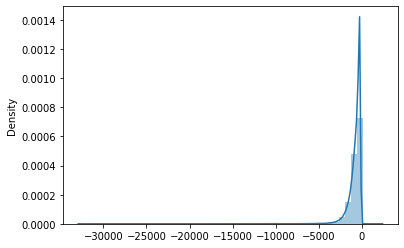

In [26]:
import seaborn as sns
sns.distplot(np.array([b['min'] for a,b in min_max.items()]))

/tmp/ipykernel_29706/3695777024.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.array([b['max'] for a,b in min_max.items()]))


<AxesSubplot:ylabel='Density'>

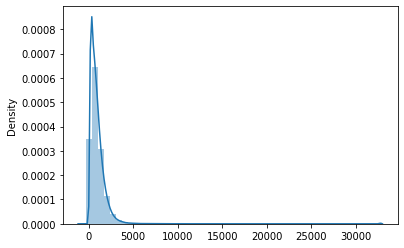

In [27]:
sns.distplot(np.array([b['max'] for a,b in min_max.items()]))

In [29]:
min_max_norm = {}

for path in meta_data.index.values:
    try:
        ecg = uncompress(path,f)
    except Exception as e:
        print(f"Failed {e}")
        continue
    
    ecg2 = np.stack([ 2 * ( (ecg[i] - normalize_table_balanced.iloc[i,0]) / (normalize_table_balanced.iloc[i,2]) ) - 1 for i in range(12) ])
    min_max_norm[path] = {}
    min_max_norm[path]['min'] = ecg2.min(axis=1)
    min_max_norm[path]['max'] = ecg2.max(axis=1)
    min_max_norm[path]['shape'] = ecg2.shape


(-5.0, 5.0)

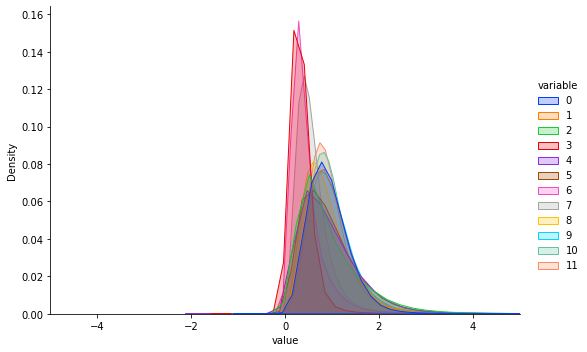

In [32]:
plot_df = pd.DataFrame(np.array([b['max'] for a,b in min_max_norm.items()]),index=[*min_max_norm]).melt()
sns.displot(data=plot_df, x='value', hue='variable', kind='kde', fill=True, palette=sns.color_palette('bright')[:10] + sns.color_palette("Set2")[0:2], height=5, aspect=1.5)
plt.xlim(-5, 5)

In [33]:
pd.DataFrame(np.array([b['max'] for a,b in min_max_norm.items()]),index=[*min_max_norm]).mean()

0     0.989226
1     0.990267
2     0.986157
3     0.421167
4     0.985640
5     0.987803
6     0.495621
7     0.605145
8     0.917954
9     0.993172
10    0.992978
11    0.991034
dtype: float32

In [34]:
pd.DataFrame(np.array([b['min'] for a,b in min_max_norm.items()]),index=[*min_max_norm]).mean()

0    -0.416879
1    -0.449023
2    -0.910136
3    -0.994075
4    -0.606666
5    -0.597616
6    -0.993874
7    -0.994165
8    -0.993183
9    -0.599763
10   -0.410750
11   -0.389839
dtype: float32

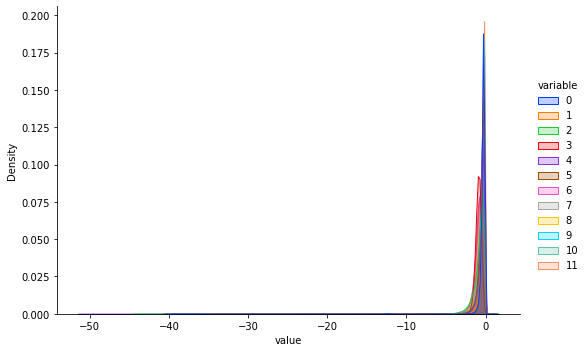

In [35]:
plot_df = pd.DataFrame(np.array([b['min'] for a,b in min_max_norm.items()]),index=[*min_max_norm]).melt()
sns.displot(data=plot_df, x='value', hue='variable', kind='kde', fill=True, palette=sns.color_palette('bright')[:10] + sns.color_palette("Set2")[0:2], height=5, aspect=1.5)

In [36]:
pd.DataFrame(np.array([b['min'] for a,b in min_max_norm.items()]),index=[*min_max_norm]).mean(axis=0)

0    -0.416879
1    -0.449023
2    -0.910136
3    -0.994075
4    -0.606666
5    -0.597616
6    -0.993874
7    -0.994165
8    -0.993183
9    -0.599763
10   -0.410750
11   -0.389839
dtype: float32

In [37]:
pd.DataFrame(np.array([b['max'] for a,b in min_max_norm.items()]),index=[*min_max_norm]).mean(axis=0)

0     0.989226
1     0.990267
2     0.986157
3     0.421167
4     0.985640
5     0.987803
6     0.495621
7     0.605145
8     0.917954
9     0.993172
10    0.992978
11    0.991034
dtype: float32

In [38]:
ecg = uncompress(meta_data.iloc[100].name,f)
ecg2 = np.stack([ 2 * ( (ecg[i] - normalize_table.iloc[i,0]) / (normalize_table.iloc[i,2]) ) - 1 for i in range(12) ])

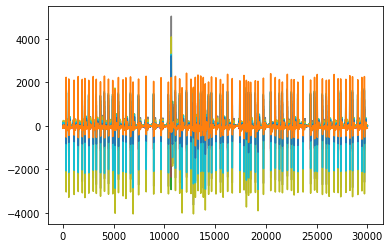

In [39]:
import matplotlib.pyplot as plt
for i in range(12): plt.plot(ecg[i,...])

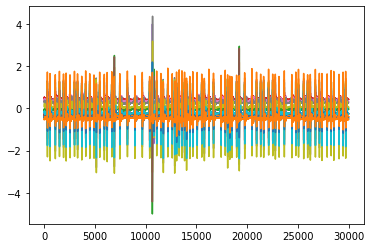

In [40]:
import matplotlib.pyplot as plt
for i in range(12): plt.plot(ecg2[i,...])

In [268]:
ecg2.mean(axis=1)

array([ 0.03651197, -0.26222497, -0.50004363,  0.12717475,  0.31652933,
       -0.3809929 ,  0.8125964 ,  0.04946727,  0.14641687, -0.7840088 ,
       -0.21696492, -0.52552074], dtype=float32)

In [257]:
normalize_table_balanced

,min,max,range
0,-813.318497,813.318497,1626.636994
1,-927.557905,927.557905,1855.115811
2,-616.430969,616.430969,1232.861938
3,-779.541208,779.541208,1559.082417
4,-598.479875,598.479875,1196.959749
5,-703.899302,703.899302,1407.798603
6,-1011.058909,1011.058909,2022.117818
7,-1519.952699,1519.952699,3039.905399
8,-1354.500198,1354.500198,2709.000397
9,-1705.832194,1705.832194,3411.664388


In [295]:
meta_data = pd.read_parquet('../../data/freeze/ecg_ages_meta__qc.pq')
meta_data = meta_data[meta_data['instance'] == 2]
meta_data

,sample_id,birthdate,enroll_date,enroll_age,sex,ecg_date,ukbid,instance,ecg_age,ecg_age_years,bad
index,,,,,,,,,,,
1000336/2,1000336,1966-04-15,2008-08-19,42.344444,0,2019-10-19 12:39:11,1000336,2,19545,53.547945,0
1000387/2,1000387,1945-01-15,2009-12-11,64.908333,0,2018-01-12 19:25:55,1000387,2,26660,73.041096,0
1000408/2,1000408,1951-09-15,2008-07-19,56.844444,0,2019-12-01 14:16:44,1000408,2,24914,68.257534,0
1000426/2,1000426,1948-05-15,2010-05-10,61.988889,0,2018-05-21 13:54:00,1000426,2,25573,70.063014,0
1000474/2,1000474,1944-03-15,2008-10-22,64.602778,0,2020-02-24 15:02:49,1000474,2,27739,75.997260,0
...,...,...,...,...,...,...,...,...,...,...,...
6025245/2,6025245,1966-04-15,2010-02-02,43.797222,1,2019-02-28 16:20:31,6025245,2,19312,52.909589,0
6025361/2,6025361,1948-07-15,2009-01-15,60.500000,1,2017-09-19 12:56:25,6025361,2,25268,69.227397,0
6025769/2,6025769,1969-12-15,2010-07-16,40.586111,1,2016-08-20 10:38:33,6025769,2,17050,46.712329,0


In [296]:
meta_data = meta_data[meta_data.bad == 0]

In [297]:
meta_data.index = [os.path.join(os.path.split(a)[0],'data') for a in meta_data.index]

In [298]:
meta_data

,sample_id,birthdate,enroll_date,enroll_age,sex,ecg_date,ukbid,instance,ecg_age,ecg_age_years,bad
1000336/data,1000336,1966-04-15,2008-08-19,42.344444,0,2019-10-19 12:39:11,1000336,2,19545,53.547945,0
1000387/data,1000387,1945-01-15,2009-12-11,64.908333,0,2018-01-12 19:25:55,1000387,2,26660,73.041096,0
1000408/data,1000408,1951-09-15,2008-07-19,56.844444,0,2019-12-01 14:16:44,1000408,2,24914,68.257534,0
1000426/data,1000426,1948-05-15,2010-05-10,61.988889,0,2018-05-21 13:54:00,1000426,2,25573,70.063014,0
1000474/data,1000474,1944-03-15,2008-10-22,64.602778,0,2020-02-24 15:02:49,1000474,2,27739,75.997260,0
...,...,...,...,...,...,...,...,...,...,...,...
6025245/data,6025245,1966-04-15,2010-02-02,43.797222,1,2019-02-28 16:20:31,6025245,2,19312,52.909589,0
6025361/data,6025361,1948-07-15,2009-01-15,60.500000,1,2017-09-19 12:56:25,6025361,2,25268,69.227397,0
6025769/data,6025769,1969-12-15,2010-07-16,40.586111,1,2016-08-20 10:38:33,6025769,2,17050,46.712329,0
6026159/data,6026159,1946-02-15,2009-01-14,62.908333,1,2017-12-22 14:31:53,6026159,2,26243,71.898630,0


In [299]:
h5py_path = '../../data/freeze/BROAD_ml4h_mdrk__ukb_resting_ecgs__processed__bddc862456eb4a65a28618789342f945__combined.h5'

In [300]:
f = h5py.File(h5py_path,'r')

In [116]:
min_max_ukb = {}

for path in tqdm.tqdm(meta_data.index.values):
    try:
        ecg = uncompress(path,f)
    except Exception as e:
        print(f"Failed {e}")
        continue
    
    min_max_ukb[path] = {}
    min_max_ukb[path]['min'] = ecg.min(axis=1)
    min_max_ukb[path]['max'] = ecg.max(axis=1)
    min_max_ukb[path]['shape'] = ecg.shape


  0%|          | 0/41426 [00:00<?, ?it/s]

In [122]:
np.array([b['min'] for a,b in min_max_ukb.items()]).min(axis=0)

array([-966., -852., -932., -962., -970., -807., -980., -995., -972.,
       -937., -951., -998.], dtype=float32)

In [123]:
np.array([b['max'] for a,b in min_max_ukb.items()]).max(axis=0)

array([987., 938., 974., 847., 934., 891., 874., 984., 973., 946., 988.,
       979.], dtype=float32)

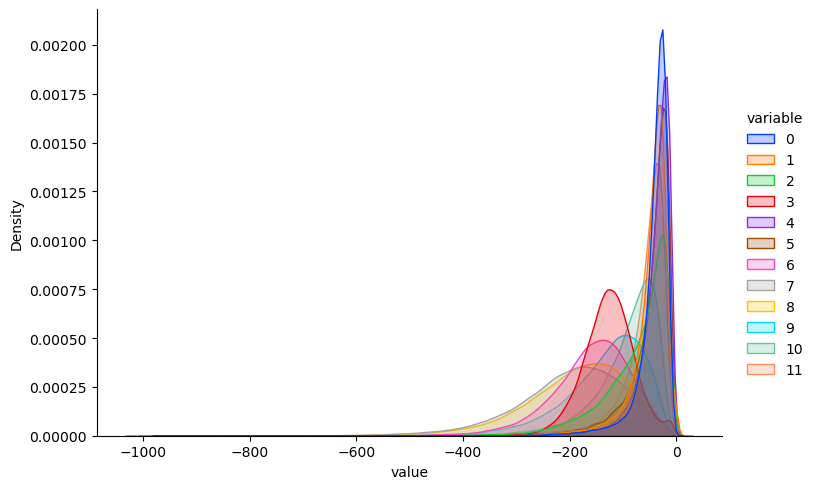

In [117]:
plot_df = pd.DataFrame(np.array([b['min'] for a,b in min_max_ukb.items()])).melt()
sns.displot(data=plot_df, x='value', hue='variable', kind='kde', fill=True, palette=sns.color_palette('bright')[:10] + sns.color_palette("Set2")[0:2], height=5, aspect=1.5)

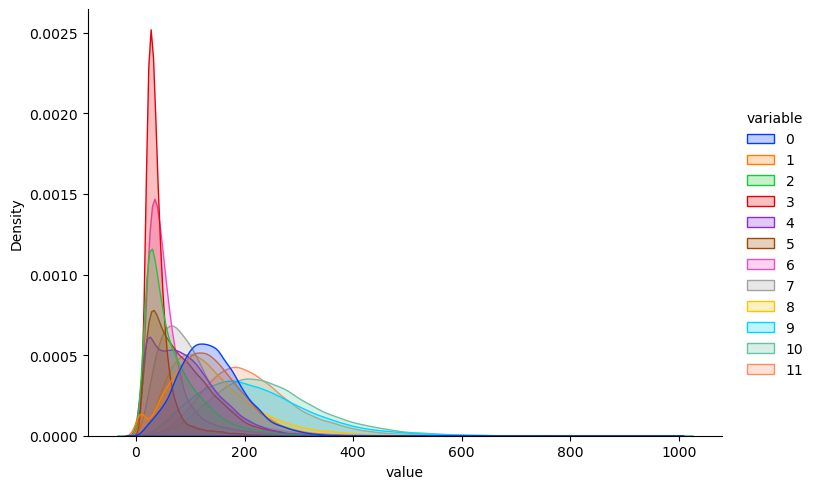

In [118]:
plot_df = pd.DataFrame(np.array([b['max'] for a,b in min_max_ukb.items()])).melt()
sns.displot(data=plot_df, x='value', hue='variable', kind='kde', fill=True, palette=sns.color_palette('bright')[:10] + sns.color_palette("Set2")[0:2], height=5, aspect=1.5)

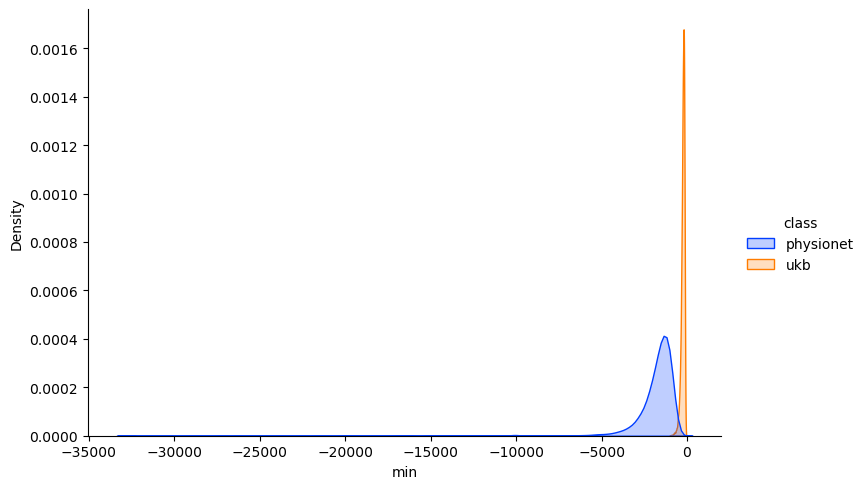

In [61]:
plot_df = pd.DataFrame({'min': [b['min'] for a,b in min_max.items()] + [b['min'] for a,b in min_max_ukb.items()], 'class': list(np.repeat('physionet',len([*min_max]))) + list(np.repeat('ukb',len([*min_max_ukb]))) })
sns.displot(data=plot_df, x='min', hue='class', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

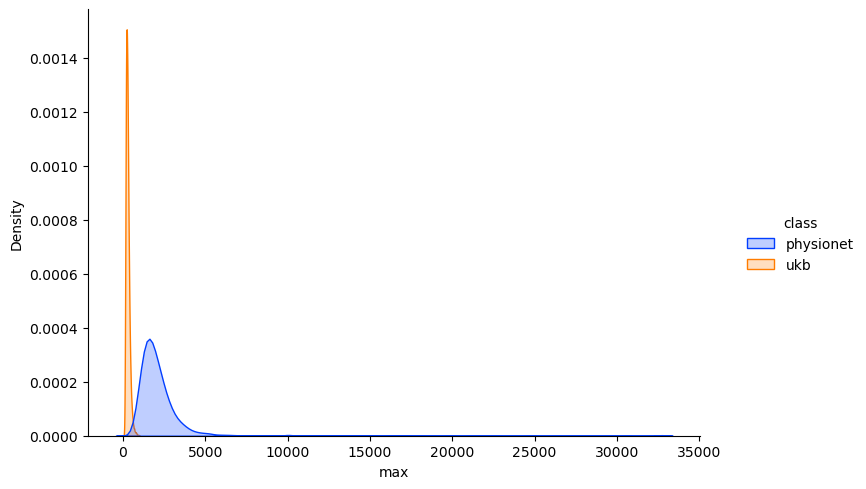

In [62]:
plot_df = pd.DataFrame({'max': [b['max'] for a,b in min_max.items()] + [b['max'] for a,b in min_max_ukb.items()], 'class': list(np.repeat('physionet',len([*min_max]))) + list(np.repeat('ukb',len([*min_max_ukb]))) })
sns.displot(data=plot_df, x='max', hue='class', kind='kde', fill=True, palette=sns.color_palette('bright')[:2], height=5, aspect=1.5)

In [292]:
temp2 = pd.DataFrame(np.array([b['min'] for a,b in min_max_ukb.items()]),index=[*min_max_ukb])

In [293]:
# lower bounds 99% confidence interval
min_99ci = temp2.apply(lambda a: st.t.interval(0.99, len(a)-1, loc=np.mean(a), scale=st.sem(a))).T.iloc[:,0]
min_99ci

0     -45.354435
1     -52.641498
2     -78.064679
3    -129.421262
4     -42.836472
5     -51.475451
6    -163.487644
7    -202.913316
8    -194.017951
9    -138.734497
10    -97.584098
11    -65.253069
Name: 0, dtype: float64

In [294]:
temp2 = pd.DataFrame(np.array([b['max'] for a,b in min_max_ukb.items()]),index=[*min_max_ukb])
# upperw bounds 99% confidence interval
max_99ci = temp2.apply(lambda a: st.t.interval(0.99, len(a)-1, loc=np.mean(a), scale=st.sem(a))).T.iloc[:,1]
max_99ci
normalize_table = pd.DataFrame({'min': min_99ci, 'max': max_99ci, 'range': max_99ci - min_99ci})
normalize_table
normalize_table_balanced = pd.DataFrame({'min': -1*normalize_table[['min','max']].apply(lambda x: x[np.argmax(x.abs())],axis=1).abs(), 'max': normalize_table[['min','max']].apply(lambda x: x[np.argmax(x.abs())],axis=1).abs()})
normalize_table_balanced['range'] = normalize_table_balanced['max'] - normalize_table_balanced['min']
normalize_table_balanced

,min,max,range
0,-139.941898,139.941898,279.883795
1,-134.566014,134.566014,269.132029
2,-78.064679,78.064679,156.129359
3,-129.421262,129.421262,258.842523
4,-92.999893,92.999893,185.999786
5,-88.909598,88.909598,177.819196
6,-163.487644,163.487644,326.975288
7,-202.913316,202.913316,405.826632
8,-194.017951,194.017951,388.035902
9,-222.348100,222.348100,444.696201


In [311]:
ecg = uncompress(meta_data.iloc[100].name,f)
ecg2 = np.stack([ 2 * ( (ecg[i] - normalize_table_balanced.iloc[i,0]) / (normalize_table_balanced.iloc[i,2]) ) - 1 for i in range(12) ])

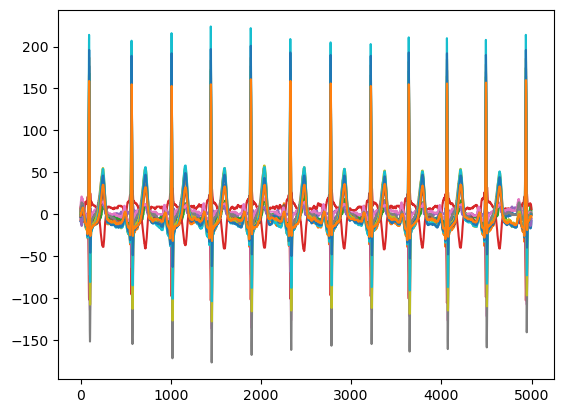

In [309]:
import matplotlib.pyplot as plt
for i in range(12): plt.plot(ecg[i,...])

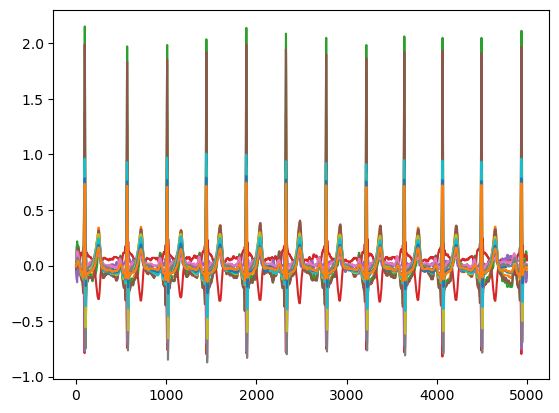

In [312]:
import matplotlib.pyplot as plt
for i in range(12): plt.plot(ecg2[i,...])

In [66]:
plot_df.groupby('class').apply(np.max)

,max,class
class,,
physionet,32767.0,physionet
ukb,988.0,ukb


In [70]:
plot_df[plot_df['max'] > 10000].sort_values('max')

,max,class
50642,10004.0,physionet
54628,10004.0,physionet
65219,10004.0,physionet
45375,10004.0,physionet
46722,10004.0,physionet
...,...,...
56647,32767.0,physionet
56963,32767.0,physionet
56993,32767.0,physionet
53182,32767.0,physionet
